In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

# Задание 1
Загрузите файл HR.csv в pandas dataframe

In [2]:
# Загрузим данные
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Получим информацию о типах значений в колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Найдем суммарное значение пропусков для всех столбцов
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Признаки:
* satisfaction_level - Уровень удовлетворенности работой
* Last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах
* work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left - уволился ли сотрудник
* promotion_last_5years - повышался ли сотрудник за последние пять лет
* department - отдел в котором работает сотрудник
* salary - относительный уровень зарплаты

# Задание 2
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
# Рассчитаем базовые метрики для каждого столбца 
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Определим медиану для каждого столбца
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

# Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее скоррелированные переменные

К количественным переменным относятся следующие столбцы:
* satisfaction_level - Уровень удовлетворенности работой
* Last_evaluation - Время с момента последней оценки в годах
* number_projects - Количество проектов, выполненных за время работы
* average_monthly_hours - Среднее количество часов на рабочем месте в месяц
* time_spend_company - Стаж работы в компании в годах

In [7]:
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


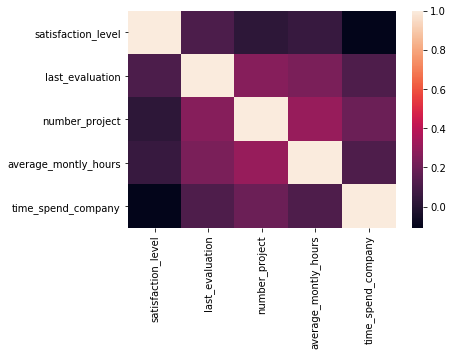

In [8]:
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(method='kendall'))

Две самые скоррелированные переменные - number_project и average_montly_hours

Две наименее скоррелированные переменные - number_project и satisfaction_level

# Задание 4
Рассчитайте сколько сотрудников работает в каждом департаменте.

In [9]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# Задание 5
Показать распределение сотрудников по зарплатам.

In [10]:
# Определим сколько сотрудников приходятся на каждый уровень зарплаты
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

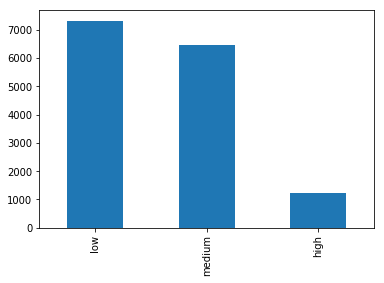

In [11]:
# Визиализируем полученные значения
df.salary.value_counts().plot(kind='bar')

# Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [12]:
df.groupby('department').salary.value_counts()

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

# Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [13]:
# Импортируем нужный тест из пакета scipy
from scipy.stats import mannwhitneyu

In [14]:
# Сформируем две группы
group_A = df[(df.salary == 'high')].average_montly_hours
group_B = df[(df.salary == 'low')].average_montly_hours

In [15]:
# Выполним U-тест Манна-Уитни
stat, p = mannwhitneyu(group_A, group_B)
print('p=%.3f' % (p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

p=0.412
Одинаковые распределения (не отвергаем H0)


Таким образом мы отвергаем гипотезу, что что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

# Задание 8
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов

In [16]:
# Определим долю сотрудников с повышением за последние 5 лет среди уволившихся сотрудников
left_and_promotion_last_5years = len(df[(df.left == 1) & (df.promotion_last_5years == 1)]) / len (df[df.left == 1])
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников - ', round(left_and_promotion_last_5years, 4))
# Определим долю сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников
work_and_promotion_last_5years = len(df[(df.left == 0) & (df.promotion_last_5years == 1)]) / len (df[df.left == 0])
print('Доля сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников - ', round(work_and_promotion_last_5years, 4))

Доля сотрудников с повышением за последние 5 лет среди уволившихся сотрудников -  0.0053
Доля сотрудников с повышением за последние 5 лет среди неуволившихся сотрудников -  0.0263


In [17]:
# Определим среднюю степень удовлетворенности среди уволившихся работников
left_and_satisfaction_level = df[(df.left == 1)].satisfaction_level.mean()
print('Средняя степень удовлетворенности среди уволившихся сотрудников - ', round(left_and_satisfaction_level, 4))
# Определим среднюю степень удовлетворенности среди неуволившихся работников
work_and_satisfaction_level = df[(df.left == 0)].satisfaction_level.mean()
print('Средняя степень удовлетворенности среди неуволившихся сотрудников - ', round(work_and_satisfaction_level, 4))

Средняя степень удовлетворенности среди уволившихся сотрудников -  0.4401
Средняя степень удовлетворенности среди неуволившихся сотрудников -  0.6668


In [18]:
# Определим cреднее количество проектов среди уволившихся работников
left_and_number_project = df[(df.left == 1)].number_project.mean()
print('Cреднее количество проектов среди уволившихся сотрудников - ', round(left_and_number_project, 0)) 
# Окургляем до целого, так как количество проектов это целое число
# Определим cреднее количество проектов среди уволившихся работников
work_and_number_project = df[(df.left == 0)].number_project.mean()
print('Cреднее количество проектов среди неуволившихся сотрудников - ', round(work_and_number_project, 0)) 

Cреднее количество проектов среди уволившихся сотрудников -  4.0
Cреднее количество проектов среди неуволившихся сотрудников -  4.0


# Задание 9
Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборки

In [19]:
# Загрузим данные без учтета столюцов department и salary
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
           'Work_accident', 'promotion_last_5years']]

data_class = df[['left']].values.ravel()

In [20]:
# Разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [21]:
# Импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()

In [23]:
# Обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [25]:
# Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,1
3747,0,0
3748,0,0


In [26]:
# Рассчитаем точность
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, lda.predict(X_test))

0.7525333333333334

In [28]:
# Коэффициенты дискриминатных линий
lda.coef_

array([[-4.57223815e+00,  6.54845407e-01, -2.29069456e-01,
         4.10500892e-03,  2.13888132e-01, -1.10515270e+00,
        -1.09966247e+00]])

Качество модели недостаточно хорошее. Требуется улучшить модель.